In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from Tkinter import Tk
from tkFileDialog import askopenfilename
from tkFileDialog import askdirectory
import nibabel as nb
from scipy import io
#from nifti import NiftiImage
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

# Open data

In [2]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/100049-100050/100049-100050regpsfkf235Smith0_4_60TS.mat


In [6]:
filename ="/media/test11/ComboPanNeuronalGCaMP6/100049-100050/100049-100050regpsfkf235Smith0_4_60TS.mat"

In [7]:
Ua=sio.loadmat(filename)
DT=Ua['TSo']
DT.shape

(13395, 235)

In [4]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/100049-100050/100049-100050regpsfkf235Smith0_4_60IC.nii


In [8]:
filename2 ="/media/test11/ComboPanNeuronalGCaMP6/100049-100050/100049-100050regpsfkf235Smith0_4_60IC.nii"

In [9]:
img1 = nb.load(filename2)
data = img1.get_data()
S=data.shape
S

(87, 52, 10, 235)

In [10]:
S=data.shape
S

(87, 52, 10, 235)

Z-score

In [11]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [12]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [13]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

# Open Masks

In [ ]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenameM = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenameM)

In [15]:
filenameM ="/media/test11/ComboPanNeuronalGCaMP6/100049-100050/100049_100050Registration/JFRCTransformedLargefullpsftrimmed.nii"

In [16]:
img1 = nb.load(filenameM)
Masks = img1.get_data()
Sm=Masks.shape
Masks=np.array(Masks)

In [17]:
filenameM='/home/sophie/LargeRegionList'
with open(filenameM) as f:
    content = f.readlines()
Names=[Line.replace('\n','').split(' ') for Line in content]
RegionName=[Names[i][1] for i in range(12)]
Num=[int(Names[i][0]) for i in range(12)]

In [18]:
RegionName

['OL',
 'VLNP',
 'VMNP',
 'AL',
 'MB',
 'LH',
 'SNP',
 'CX',
 'LX',
 'INP',
 'PENP',
 'GNG']

# Average in masks to sort components by brain region

In [19]:
Dmaps.shape

(87, 52, 10, 235)

In [20]:
M=np.zeros((S[3],13))
Mapmean=np.zeros(S[3])
MMasks=np.zeros(13)

In [21]:
for i in range(S[3]):
    Mapmean[i]=np.mean(np.mean(np.mean(Dmaps[:,:,:,i])))
    for j in range(12):
        MMasks[j]=np.mean(np.mean(np.mean(Masks[:,:,:,j])))
        if MMasks[j]:
            M[i,j]=np.mean(np.mean(np.mean(Masks[:,:,:,j]*Dmaps[:,:,:,i])))/(MMasks[j]*Mapmean[i])

In [22]:
CompMainName=S[3]*['']
CompNameAdd=np.zeros((S[3],12))
for i in range(S[3]):
    Max=np.max(M[i,:])
    I=np.argmax(M[i,:])+1
    for j in range(12):
        J=[l for l in range(12) if Num[l]==(j+1)]
        if M[i,j]>0.2*Max:
            CompNameAdd[i,J]=1
    J=[l for l in range(12) if Num[l]==I]
    if J!= []:
        CompMainName[i]=Names[np.array(J)][0]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [23]:
J

[2]

OL


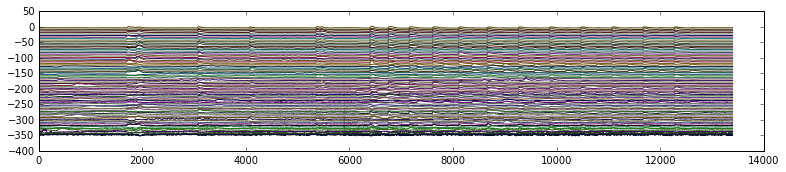

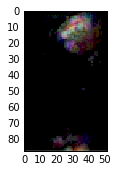

VLNP


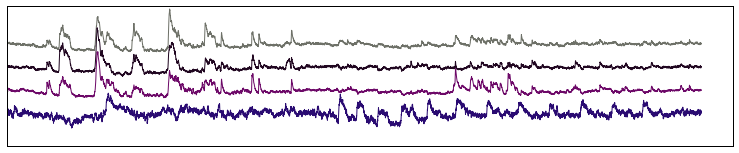

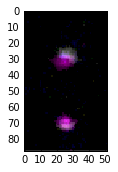

VMNP


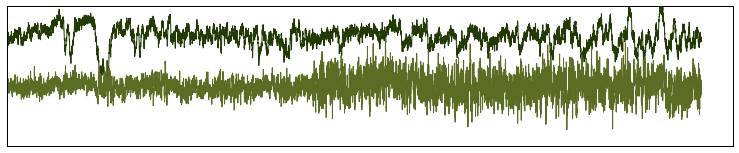

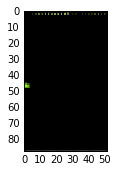

AL


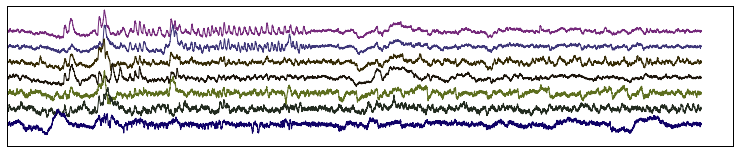

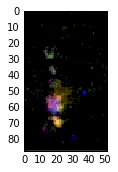

MB


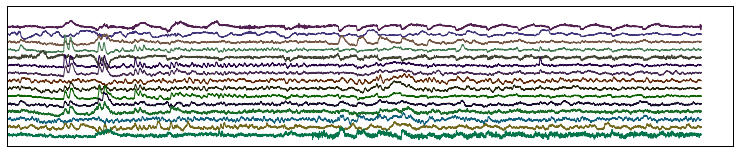

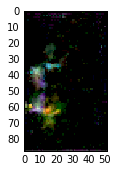

LH


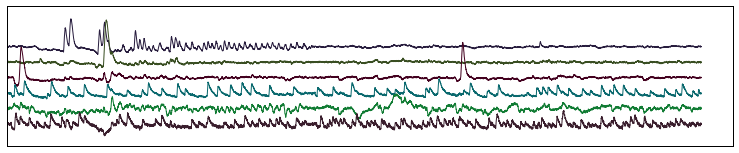

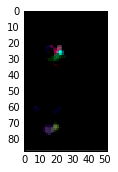

SNP


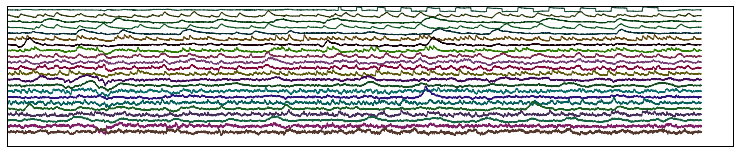

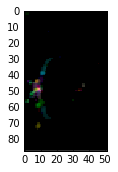

CX


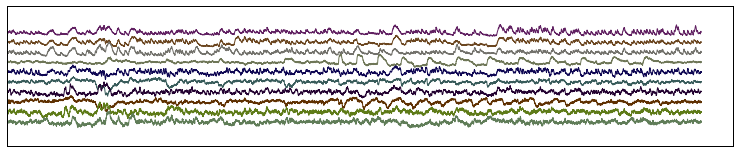

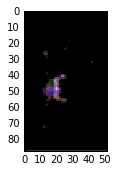

LX


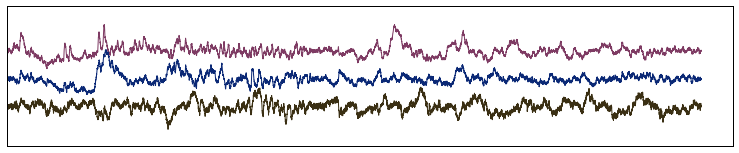

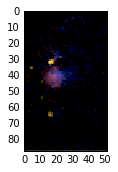

PENP


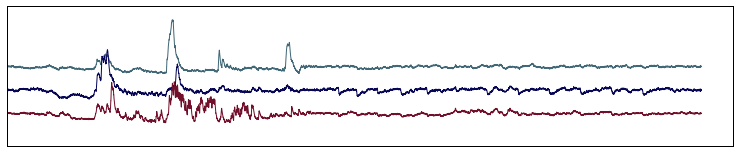

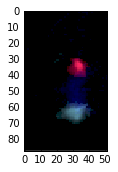

GNG


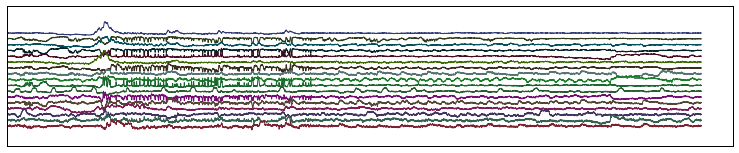

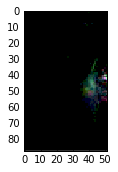

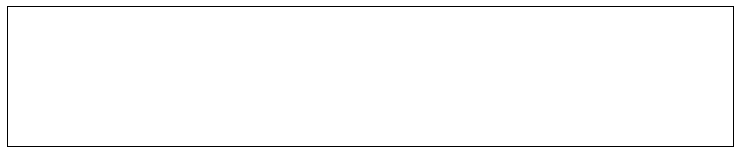

In [24]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
GoodICAnat=np.zeros(S[3])

for l in range(12):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<200:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
            Final_maps=Final_maps+Fmap
            #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            tot=tot+1
            GoodICAnat[i]=1
            
                    
    if n!=0:
        print(RegionName[l])
        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        


##### Looked at the components maps and time series and remove all the components which are localized on the edge of the brain and with activity unlike GCaMP6 transients.


In [25]:
BadICs=[5,71,200,162,40,46,87,105,170,129,111,227,34,234]

In [26]:
for idx in BadICs:
    GoodICAnat[idx] = 0.0

0
1
2
3
4
6
7
8
9
10
11
12
13
14
16
17
20
23
24
26
28
30
31
33
37
38
41
42
43
44
48
49
50
52
54
57
62
65
66
69
70
73
77
78
81
83
89
91
95
97
99
101
102
106
107
110
113
115
116
119
125
126
127
138
144
145
154
166
213
231
OL


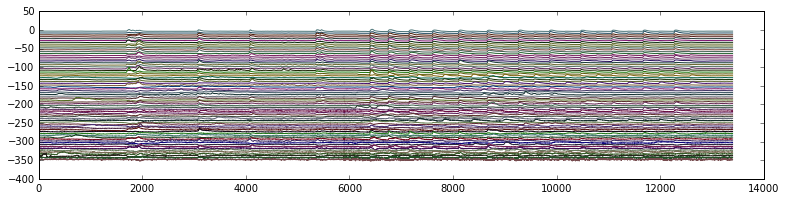

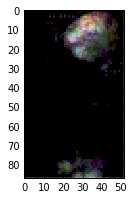

25
29
32
132
VLNP


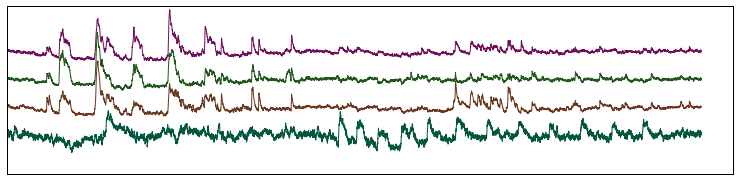

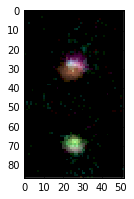

60
85
94
98
142
155
169
AL


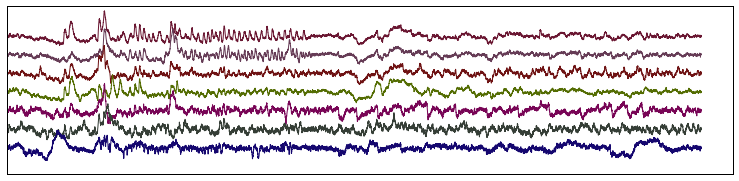

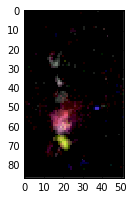

39
53
55
75
76
80
82
86
90
121
131
153
MB


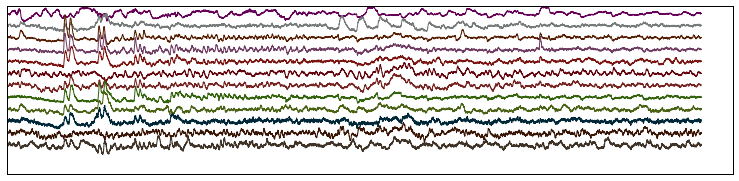

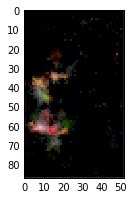

22
61
88
100
103
174
LH


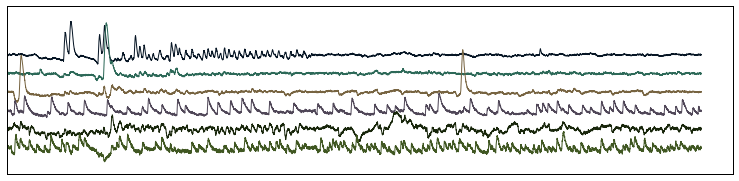

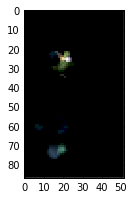

35
36
51
56
112
118
124
130
134
143
148
150
151
157
158
159
160
167
168
195
208
SNP


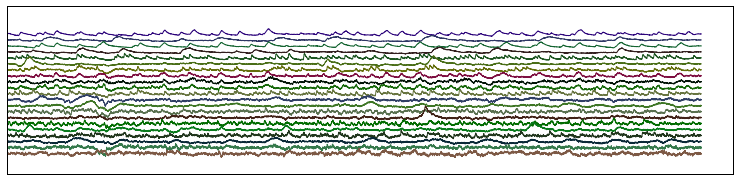

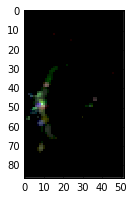

59
68
79
84
96
104
122
140
165
182
CX


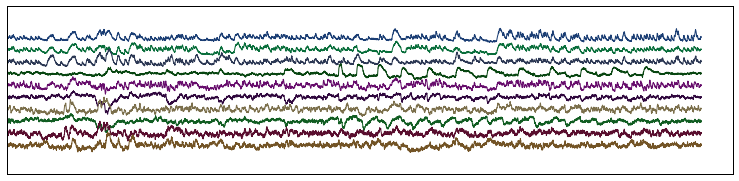

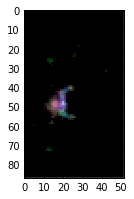

64
92
164
LX


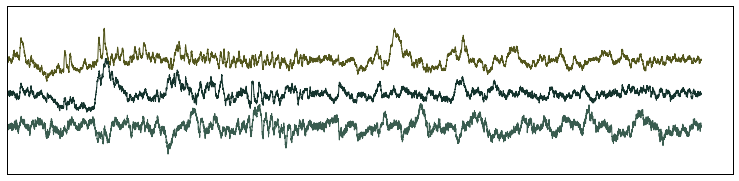

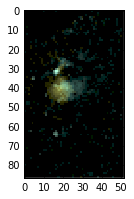

18
19
21
PENP


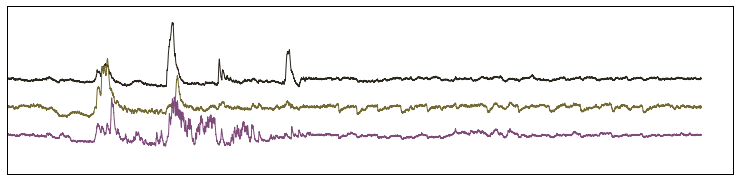

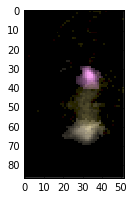

15
45
47
67
108
114
135
137
141
180
GNG


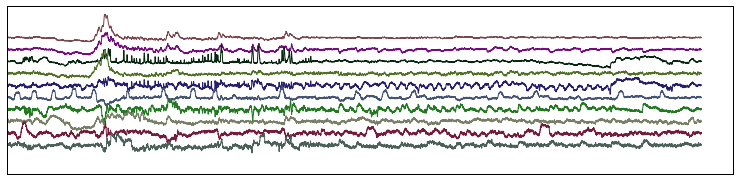

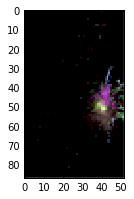

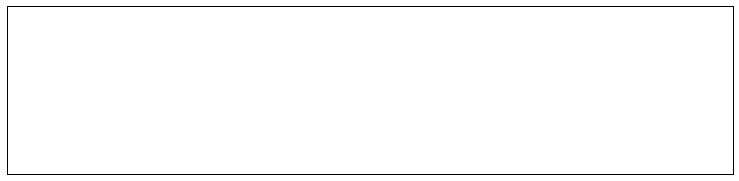

In [27]:
pylab.rcParams['figure.figsize'] = (13, 3)

h=5
tot=0
NumberInLargeRegion=np.zeros(13)

for l in range(12):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<200 and GoodICAnat[i]==1:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.7*Dmmv*(C[k]+0.2)/np.max(C+0.2)
            Final_maps=Final_maps+Fmap
            #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            tot=tot+1
            GoodICAnat[i]=1
            print(i)
                    
    if n!=0:
        print(RegionName[l])
        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
                
    NumberInLargeRegion[l]=n
        

In [28]:
BadICs=[178,209,186,200,217,208,155,164,113,215,203,125,214]

In [ ]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

In [29]:
filename ="/media/test11/ComboPanNeuronalGCaMP6/100049-100050/100049_100050Xk.mat"

In [30]:
Ua=sio.loadmat(filename)
Xk=Ua['Xk']

In [ ]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenamet = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenamet)

In [32]:
filenamet ="/media/test11/ComboPanNeuronalGCaMP6/100049-100050/100049_100050Registration/AVG_100049-100050reg100050.nii"

In [33]:
nimt=nb.load(filenamet)
Dtemp=np.squeeze(nimt.get_data())
Dtemp.shape

(87, 52, 37)

/usr/local/lib/python2.7/dist-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


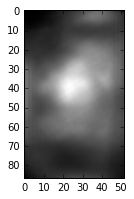

In [34]:
if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    D1=np.zeros([S[0],S[1],Nstack])
    Dmean=np.squeeze(data[:,:,range(Nstack),2])
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        Dmean[:,:,i]=Vmean
else:
    Nstack=S[2]
    D1=np.zeros([S[0],S[1],S[2]])
    Dmean=data[:,:,range(S[2])]  
    Dmean=np.squeeze(Dtemp[:,:,:])

for j in range(S[3]):

    a=''
    if S[2]>5:
        for i in range(Nstack):
            V=Dmaps[:,:,Indices[i],j]
            D1[:,:,i]=np.max(V,2)
        D2[:,:,:,j]=D1
        D1[D1==0]=np.nan

plt.imshow(Dmean[:,:,1],cmap=plt.cm.gray)

In [35]:
from sklearn import linear_model

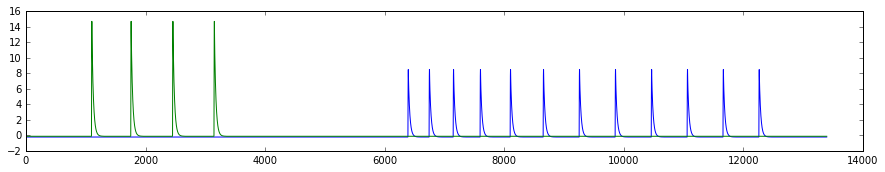

In [36]:
my_cmap=plt.cm.jet
my_cmap.set_bad(alpha=0)
Good_ICs=np.zeros(S[3])
Label_ICs=[]
pylab.rcParams['figure.figsize'] = (15, 2.5)

algorithm = linear_model.LinearRegression()

Sxk=Xk.shape

Sxk

X=np.zeros((Sxk[0],2))

X[:,0]=(Xk[:,0]-np.mean(Xk[:,0]))/np.std(Xk[:,0])
X[:,1]=(Xk[:,1]-np.mean(Xk[:,1]))/np.std(Xk[:,1])
#X[:,2]=(Xk[:,3]-np.mean(Xk[:,3]))/np.std(Xk[:,3])
#X[:,3]=(Xk[:,4]-np.mean(Xk[:,4]))/np.std(Xk[:,4])
#X[:,4]=(Xk[:,6]-np.mean(Xk[:,6]))/np.std(Xk[:,6])
#X[:,5]=(Xk[:,7]-np.mean(Xk[:,7]))/np.std(Xk[:,7])

plt.plot(X[:,0])
plt.plot(X[:,1])

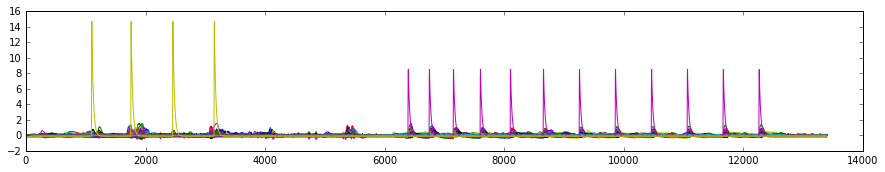

In [37]:
Rsq=np.zeros((1,S[3]))
Betas=np.zeros((2,S[3]))

X.shape

DT.shape

for j in range(S[3]):
    model = algorithm.fit(X, DT[:,j])
    Betas[:,j] = model.coef_
    Rsq[:,j] = model.score(X,DT[:,j])

plt.plot(DT)
plt.plot(X)

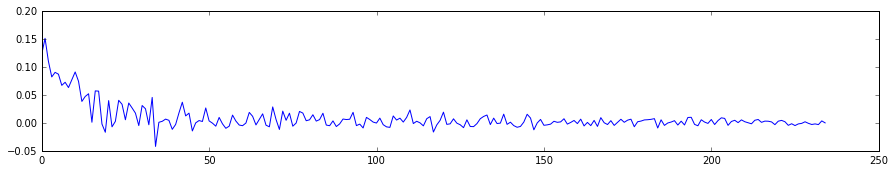

In [38]:
RsqUni=np.zeros((6,S[3]))
BetaUni=np.zeros((6,S[3]))

Sx=X.shape

for k in range(2):
    for j in range(S[3]):
        model = algorithm.fit(np.reshape(X[:,k],(Sx[0],1)), DT[:,j])
        BetaUni[k,j] = model.coef_
        RsqUni[k,j] = model.score(np.reshape(X[:,k],(Sx[0],1)),DT[:,j])
    

plt.plot(Betas[0,:])

In [39]:
import random

In [40]:
if S[2]>5:
    Final_map=np.zeros([S[0],S[1],5,3])
    Fmaps=np.zeros([S[0],S[1],5,3])
else:
    Final_map=np.zeros([S[0],S[1],3]) 
    Fmaps=np.zeros([S[0],S[1],3])    
C=np.zeros([S[3],3])
C1=np.zeros([6,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
S1=DT.shape

In [41]:
C=np.zeros((S[3],3))
i=0
l=0
Betas2=Betas
LightNuminRegion=np.zeros(12)
for j in range(S[3]):  
    if Betas2[0,j]>0.1*np.max(Betas2[0,:]) and abs(Betas2[1,j])<0.1*np.max(Betas2[1,:]):
    #if 1>0.1:
        #C[j,:]=C1[i%6][:]
        C[j,2]=1
        C[j,1]=Betas2[0,j]/np.max(Betas2[0,:])
        #C[j,2]=1
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.25*D2[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #Betas[0,j]=0
        #print(Indexo[j])
        print(j+1)
        print(RegionName[int(CompMainName[j])-1])     
        LightNuminRegion[int(CompMainName[j])-1]=LightNuminRegion[int(CompMainName[j])-1]+1
        i=i+1
        l=l+1

        #if l==2:
            #break
    

6
SNP
9
OL
15
OL
21
OL
25
OL
27
OL
28
GNG
29
OL
31
OL
34
OL
42
OL
43
OL
45
OL
50
OL
63
OL
67
OL
70
OL
75
OL
78
OL
79
OL
85
CX
111
OL
121
GNG
139
OL
146
OL


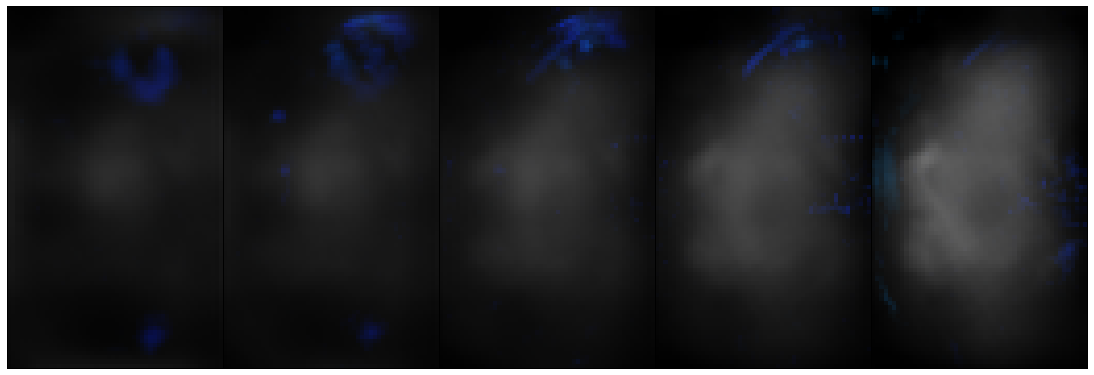

In [42]:
pylab.rcParams['figure.figsize'] = (15, 6)
C2=np.zeros(3)

Df=np.zeros([S[0],S[1],5,3]) 
  
for i in range(3):
    Df[:,:,:,i]=Final_map[:,:,:,i]+Dmean/10
    #Df=Df/(np.max(np.max(np.max(Df),3)))
if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
    #if Good_ICs[j]:
        plt.subplot(1,N,i+1)
        plt.imshow(Df[:,:,i],cmap=plt.cm.gray)
        plt.imshow(Df[:,:,i,:],cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
plt.tight_layout(pad=0,w_pad=0,h_pad=0)

In [43]:
C=np.zeros((S[3],3))
i=0
l=0
Betas2=Betas
OdorNuminRegion=np.zeros(12)

for j in range(S[3]):  
    if Betas2[1,j]>0.1*np.max(Betas2[1,:]) and abs(Betas2[0,j])<0.1*np.max(Betas2[0,:]):
    #if 1>0.1:
        #C[j,:]=C1[i%6][:]
        C[j,0]=1
        C[j,1]=Betas2[1,j]/np.max(Betas2[1,:])
        #C[j,2]=1
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.25*D2[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #Betas2[1,j]=0
        #print(Indexo[j])
        OdorNuminRegion[int(CompMainName[j])-1]=OdorNuminRegion[int(CompMainName[j])-1]+1
        print(RegionName[int(CompMainName[j])-1])
        i=i+1
        l=l+1
        print(j+1)
        #if l==2:
         #   break

NumOdor=i
print('Number of odor components')
print(i)

GNG
16
PENP
19
PENP
22
LH
23
VLNP
26
VLNP
30
VLNP
33
GNG
41
GNG
46
GNG
47
MB
54
MB
56
VLNP
59
CX
60
AL
61
LX
65
GNG
68
CX
69
MB
76
MB
77
CX
80
MB
83
AL
86
MB
87
GNG
88
MB
91
LX
93
AL
95
AL
99
OL
108
MB
122
CX
123
OL
124
GNG
129
GNG
136
LH
137
GNG
140
AL
143
SNP
150
LH
153
MB
157
CX
166
AL
170
SNP
186
Number of odor components
44


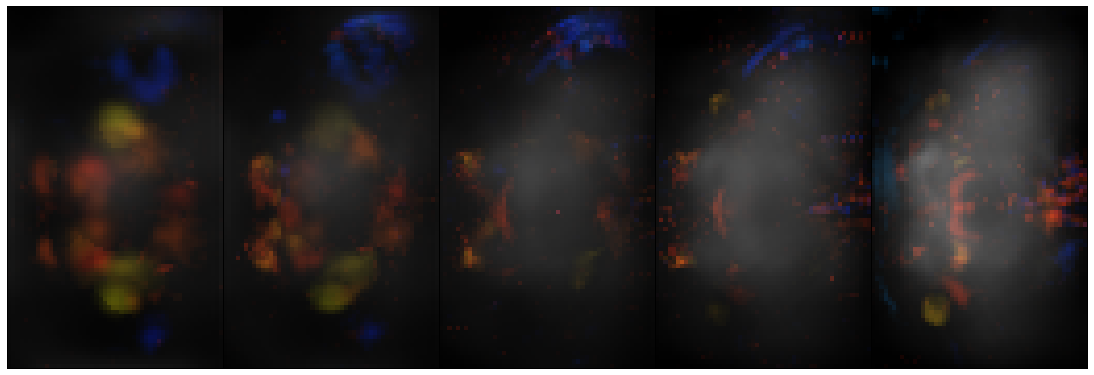

In [44]:
pylab.rcParams['figure.figsize'] = (15, 6)
C2=np.zeros(3)

Df=np.zeros([S[0],S[1],5,3]) 
  
for i in range(3):
    Df[:,:,:,i]=Final_map[:,:,:,i]+Dmean/10
    #Df=Df/(np.max(np.max(np.max(Df),3)))
if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
    #if Good_ICs[j]:
        plt.subplot(1,N,i+1)
        plt.imshow(Df[:,:,i],cmap=plt.cm.gray)
        plt.imshow(Df[:,:,i,:],cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
plt.tight_layout(pad=0,w_pad=0,h_pad=0)

In [60]:
np.savetxt('/'.join(filename.split('/')[:-1])+'/OdorNumberInLargeRegions.txt',OdorNuminRegion)
np.savetxt('/'.join(filename.split('/')[:-1])+'/LightNumberInLargeRegions.txt',LightNuminRegion)

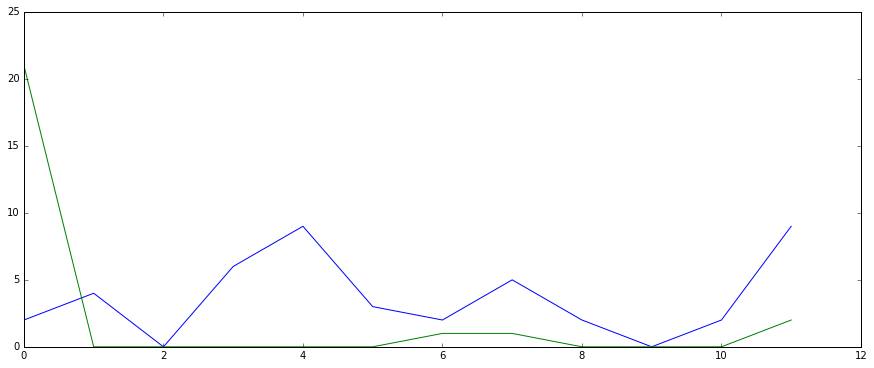

In [61]:
plt.plot(OdorNuminRegion)
plt.plot(LightNuminRegion)

In [57]:
C=np.zeros((S[3],3))
i=0
l=0
Betas2=Betas
MultiNuminRegion=np.zeros(12)

for j in range(S[3]):  
    if Betas2[1,j]>0.005 and abs(Betas2[0,j])>0.005:
    #if 1>0.1:
        #C[j,:]=C1[i%6][:]
        C[j,0]=1
        C[j,1]=Betas2[1,j]/np.max(Betas2[1,:])
        #C[j,2]=1
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.25*D2[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #Betas2[1,j]=0
        #print(Indexo[j])
        MultiNuminRegion[int(CompMainName[j])-1]=MultiNuminRegion[int(CompMainName[j])-1]+1
        print(RegionName[int(CompMainName[j])-1])
        i=i+1
        l=l+1
        print(j+1)
        #if l==2:
         #   break

NumMulti=i
print('Number of multimodal components')
print(i)

OL
1
OL
2
OL
3
OL
4
OL
5
OL
7
OL
8
OL
10
OL
11
OL
12
OL
13
OL
17
OL
18
PENP
20
PENP
22
OL
24
VLNP
26
OL
32
GNG
46
MB
54
MB
56
CX
69
GNG
73
MB
76
MB
87
MB
91
LX
93
VLNP
94
AL
99
OL
108
OL
124
GNG
129
GNG
136
AL
143
SNP
150
MB
157
SNP
186
Number of multimodal components
37


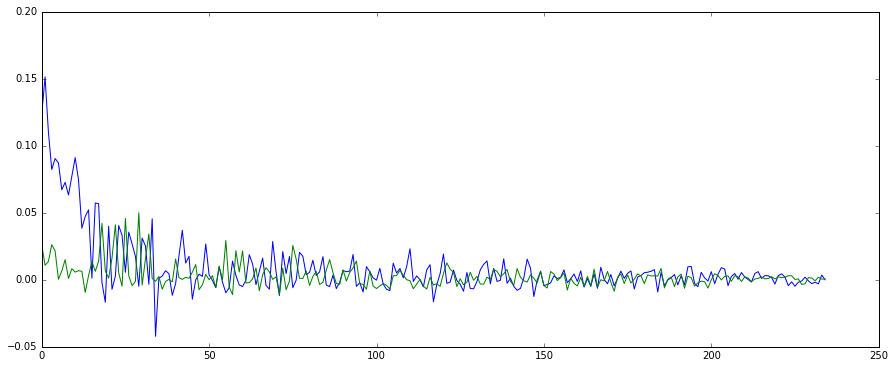

In [53]:
plt.plot(Betas.T)

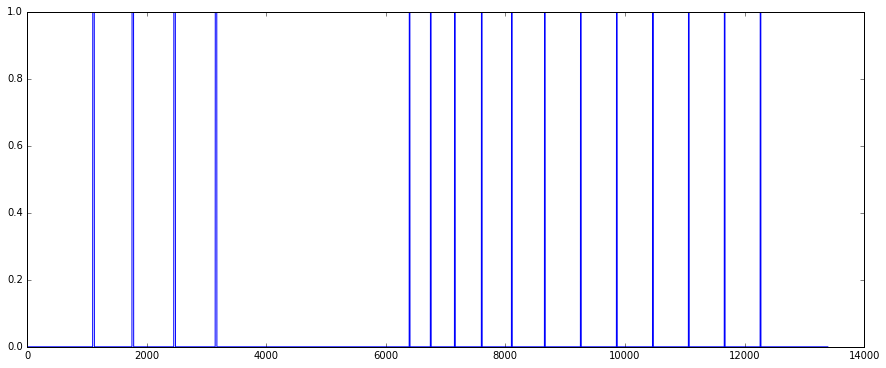

In [67]:
Xthresh=abs(np.diff(X))-6
Xthresh[Xthresh<0]=0
Xthresh[Xthresh>0]=1
plt.plot(Xthresh)

Xthresh.shape

AvLightIC=np.zeros(DT.shape[1])        
for j in range(S[3]):
    k=0
    for i in range(4000,13000):
        if Xthresh[i,0]==1:
            AvLightIC[j]=AvLightIC[j]+(np.mean(DT[i:i+200,j])-np.mean(DT[i-200:i,j]))/(2*np.std(DT[i-200:i,j]))
            k=k+1
    AvLightIC[j]=AvLightIC[j]/k

AvOdorIC=np.zeros(DT.shape[1])        
for j in range(S[3]):
    k=0
    for i in range(4000):
        if Xthresh[i,0]==1:
            AvOdorIC[j]=AvOdorIC[j]+(np.mean(DT[i:i+200,j])-np.mean(DT[i-200:i,j]))/(2*np.std(DT[i-200:i,j]))
            k=k+1
    AvOdorIC[j]=AvOdorIC[j]/k

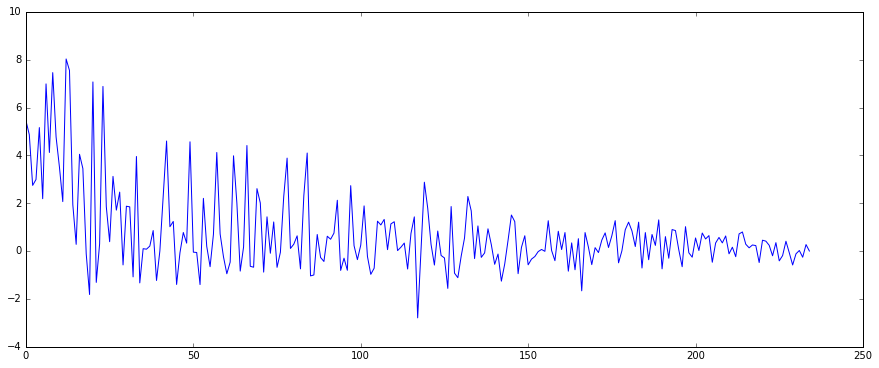

In [82]:
plt.plot(AvLightIC)

In [88]:
C=np.zeros((S[3],3))
i=0
l=0

LightNuminRegionAv=np.zeros(12)
for j in range(S[3]):  
    #if AvLightIC[j]>1 and GoodICAnat[j]:
    if AvLightIC[j]>1 and AvOdorIC[j]>1:
        #C[j,:]=C1[i%6][:]
        C[j,2]=1
        C[j,1]=1
        #C[j,2]=1
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.5*D2[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #Betas[0,j]=0
        #print(Indexo[j])
        print(j+1)
        #print(CompMainName[j]) 
        print(RegionName[int(CompMainName[j])-1])
        
        i=i+1
        l=l+1
        LightNuminRegionAv[int(CompMainName[j])-1]=LightNuminRegionAv[int(CompMainName[j])-1]+1
        #if l==2:
            #break
    

31
OL
54
MB
